# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## EDA with Visualization


In this project, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this section, we will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](./assets/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](./assets/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Importing Libraries and Defining Auxiliary Functions


We will import the following libraries:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df = pd.read_csv('.//Datasets//dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


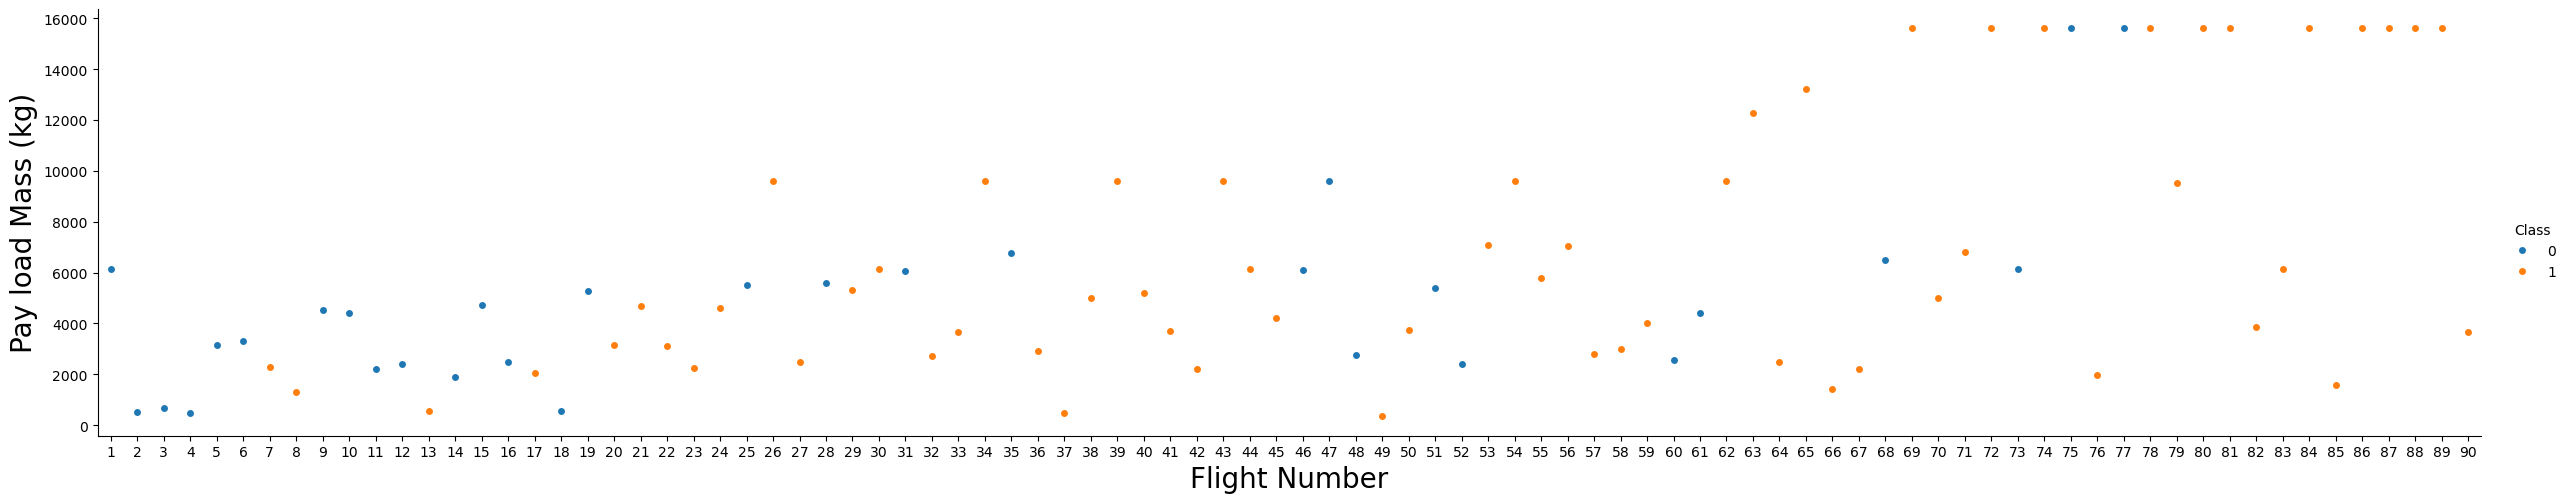

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### Visualizing the relationship between Flight Number and Launch Site


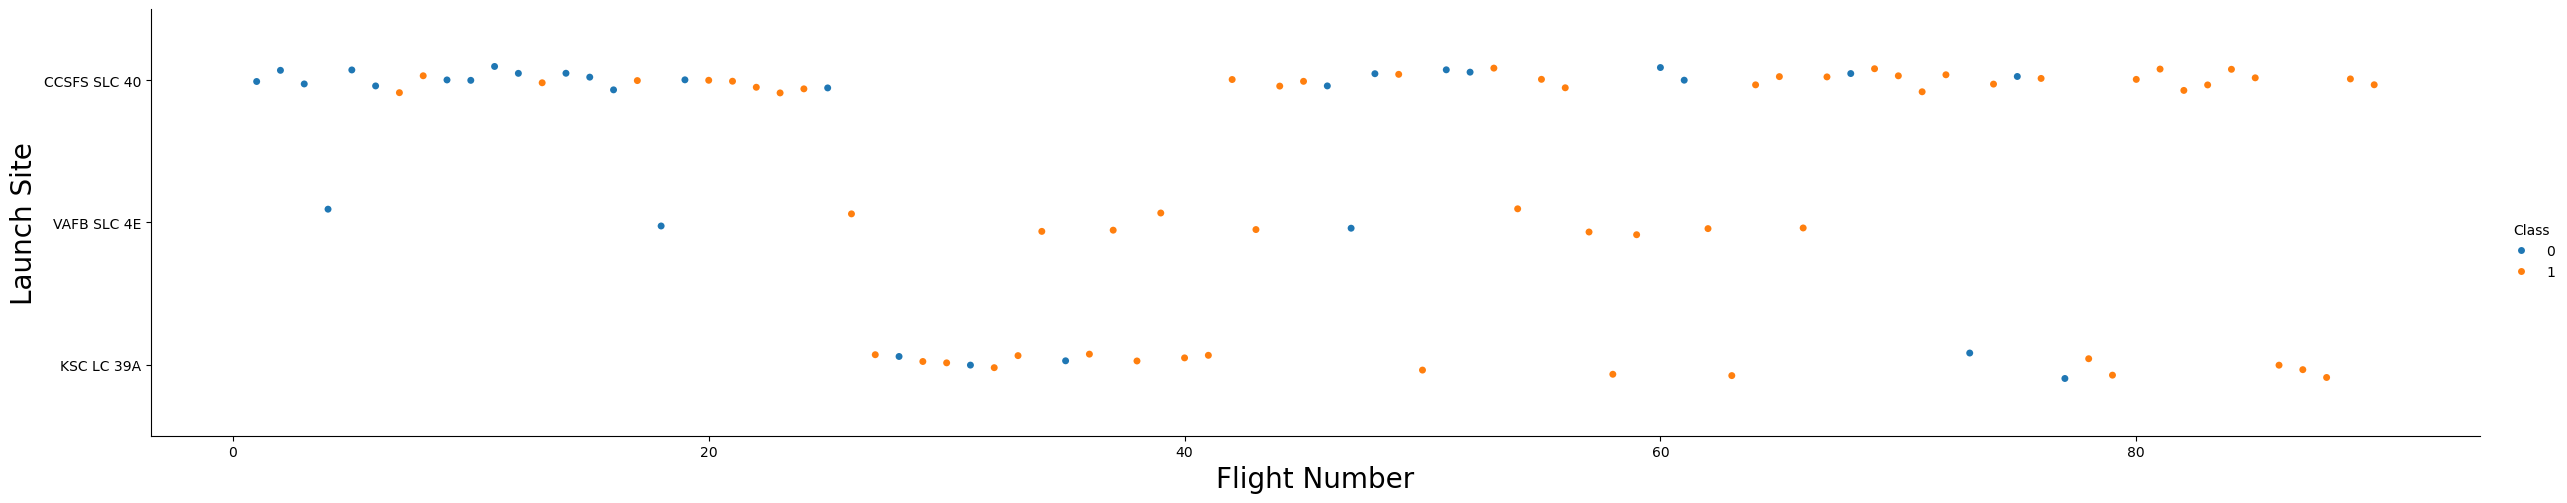

In [4]:
# Plotting a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(data=df,x='FlightNumber',y='LaunchSite',hue='Class',aspect=5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

It looks like most part of the flights were launched from CCSFS SLC 40, with a uniform distribution of sucess and fail outcomes. The last flights were specially launched from CCSFS SLC 40 and KSC LC 39A.


### Visualizing the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


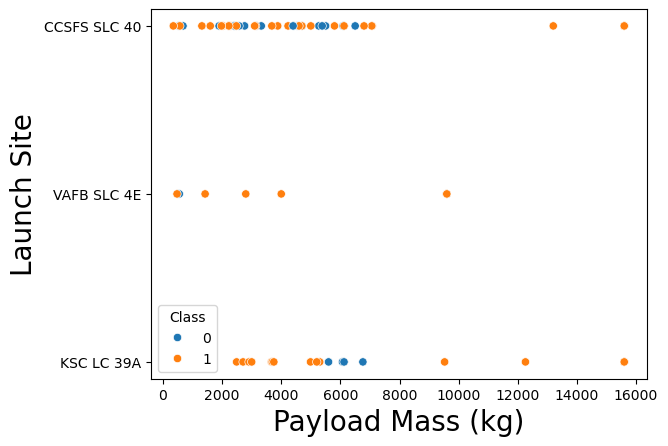

In [5]:
# Ploting a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(data=df,x='PayloadMass',y='LaunchSite',hue='Class',marker='o')
plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

Now if we observe PayloadVs.Launch Site scatter point chart we will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass (greater than 10000).


### Visualizing the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


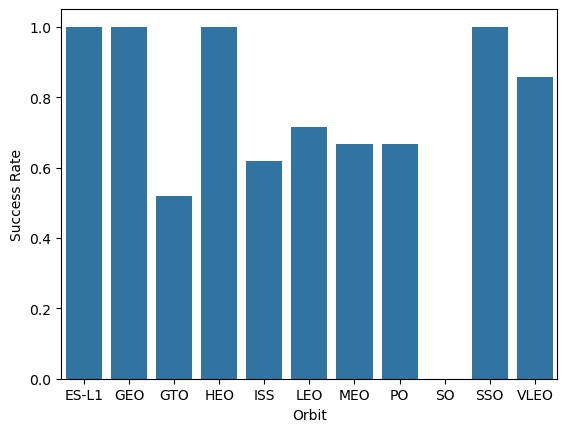

In [6]:
success=df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(data=success,x='Orbit',y='Class')
plt.ylabel('Success Rate')
plt.show()

By Analyzing the ploted bar chart, we find that the orbits ES-L1, HEO, and SSO have high sucess rate.


### Visualizing the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


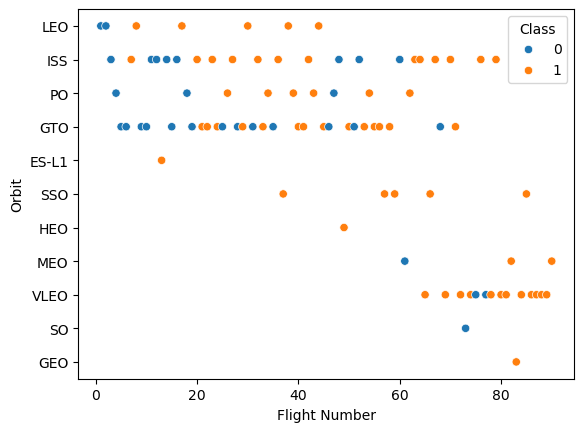

In [7]:
# Plotting a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(data=df,x='FlightNumber',y='Orbit',hue='Class',marker='o')
plt.xlabel('Flight Number',fontsize=10)
plt.ylabel('Orbit',fontsize=10)
plt.show()

We see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualizing the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


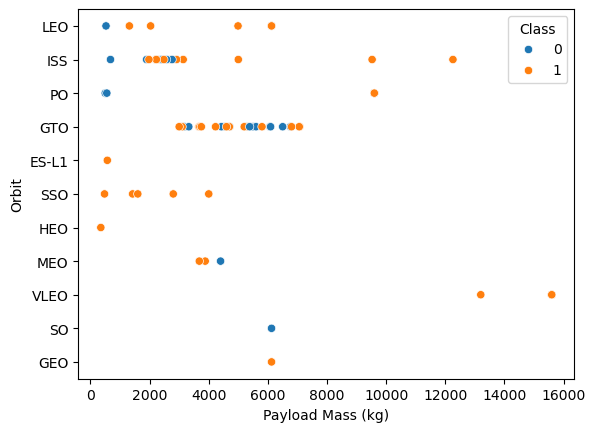

In [8]:
# Plotting a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(data=df,x='PayloadMass',y='Orbit',hue='Class',marker='o')
plt.xlabel('Payload Mass (kg)',fontsize=10)
plt.ylabel('Orbit',fontsize=10)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.




### Visualizing the launch success yearly trend


We will plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

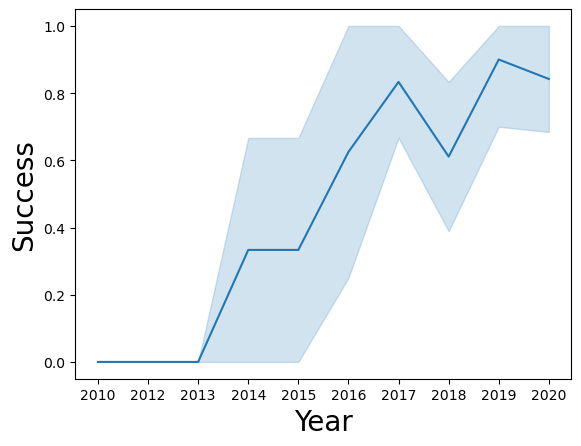

In [10]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
Extract_year(df['Date']) 
sns.lineplot(data=df,x=year,y='Class') 
plt.xlabel('Year',fontsize=20) 
plt.ylabel('Success',fontsize=20) 
plt.show()

We can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, we already have some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### Creating dummy variables to categorical columns


We will use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. We will then assign the value to the variable <code>features_one_hot</code>, display the results using the method head. The result dataframe will include all features including the encoded ones.


In [12]:
# Selecting the original features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]

# Applying one-hot encoding to the specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Displaying the first few rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### Casting all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, we will cast the entire dataframe to variable type <code>float64</code>


In [13]:
features_one_hot=features_one_hot.astype('float64')

We can now export it to a <b>CSV</b> for the next section.


In [14]:
features_one_hot.to_csv('./Datasets/dataset_part_3.csv', index=False)

## Author
**Filipe B. Carvalho**

**Email:** [filipebraiman@gmail.com](mailto:filipebraiman@gmail.com)  
**LinkedIn:** [linkedin.com/in/filipe-b-carvalho](https://www.linkedin.com/in/filipe-b-carvalho)  
**GitHub:** [github.com/filipe-braiman](https://github.com/filipe-braiman)  

### About Me  
Data and AI professional with experience in **AI model evaluation, data annotation, and NLP projects**, currently contributing to AI initiatives at **Huawei**. Skilled in **Python, SQL, data visualization, machine learning, AI, and dataset building**, and certified through the **IBM Data Science Professional Certificate**. Multilingual in **Portuguese, English, Spanish, Turkish, and French**, bringing a linguistic and analytical perspective to data-driven problem solving. Passionate about leveraging data and AI to create practical, high-impact solutions.

---

### Version History

| Version | Date       | Changes                         |
|:--------:|:-----------|:--------------------------------|
| 1.0      | 2025-10-29 | First publication of the notebook |